In [ ]:
%pip install telethon

Подключение к телеграмму

In [8]:
api_id = 27676141
api_hash = '9b207f09f9abd902b61a63f57dff96c5'

In [ ]:
from telethon import TelegramClient
client = TelegramClient(None, api_id, api_hash, system_version="4.16.30-vxCUSTOM")
await client.start()
client.session.save()

Получение id чата и канала для задания

In [ ]:
async for dialog in client.iter_dialogs():
    if dialog.is_group:
        print(dialog.id, dialog.name)

<h3>Часть 1: Анализ пользователей группы в тг

ссылка на чат = 'https://t.me/commentfemale'

Получение списка участников группы 

In [ ]:
%pip install pandas

In [66]:
from telethon.tl.functions.users import GetFullUserRequest
import pandas as pd

group_id = -1001439962922
group_link = 'https://t.me/commentfemale'

users = await client.get_participants(group_link)
users_df = []

for user in users:
    users_df.append({'id': user.id, 'name': user.first_name, 'phone': user.phone, 
                       'premium': user.premium, 'photo': user.photo})

users_df = pd.DataFrame(users_df)

In [47]:
users_df

,id,name,phone,premium,photo
0,688528781,Катерина,79252239400,False,"UserProfilePhoto(photo_id=2957208597205985236,..."
1,1642150577,Сантьяго,None,False,"UserProfilePhoto(photo_id=5449852357031614386,..."
2,6210010999,马里奥,None,False,"UserProfilePhoto(photo_id=5201667384069444542,..."
3,1307295264,Владимир,None,True,"UserProfilePhoto(photo_id=5204164018493838337,..."
4,1124667085,D2iesirae,None,False,"UserProfilePhoto(photo_id=5404773398200043722,..."
...,...,...,...,...,...
1256,512189534,Диана,None,False,None
1257,823117150,Сыч,None,False,"UserProfilePhoto(photo_id=3535261240482965435,..."
1258,227811484,Элина,None,False,None
1259,844678071,Олеся,None,False,"UserProfilePhoto(photo_id=3627864691049605039,..."


<h4>Общее количество пользователей</h4>

In [67]:
len(users_df)

1261

<h4>Количество пользователей с открытыми номерами телефонов</h4>

In [78]:
users_df[users_df['phone'].notnull()].shape

(34, 5)

<h4>Количество пользователей с Telegram Premium</h4>

In [76]:
users_df[users_df['premium']==True].shape

(146, 5)

<h4>Статистика имен пользователей в группе</h4>

In [70]:
names = users_df['name'].value_counts()[:10]
names

name
Анастасия     14
Дарья         13
Мария          8
Александра     6
Валерия        6
Маша           6
.              6
Даша           6
Александр      5
Екатерина      5
Name: count, dtype: int64

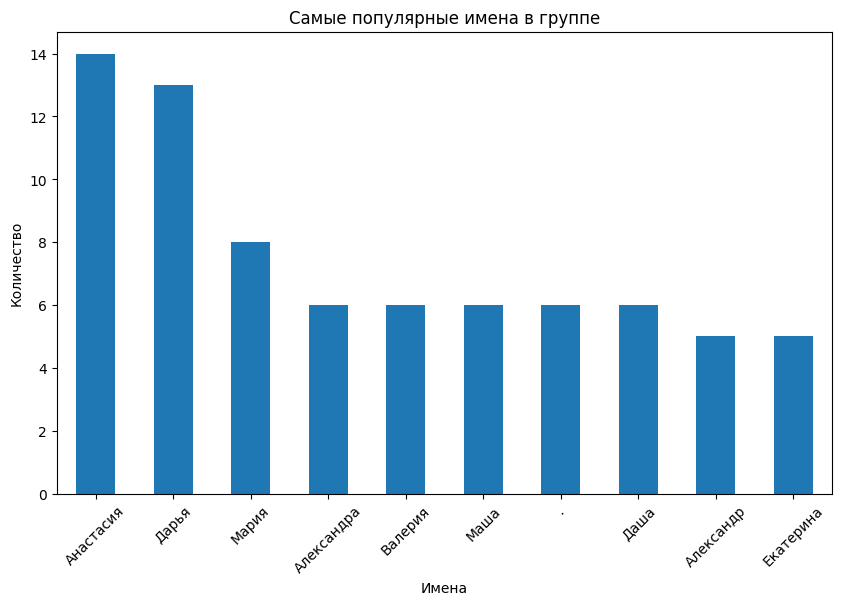

In [71]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
names.plot(kind='bar')
plt.title('Самые популярные имена в группе')
plt.xlabel('Имена')
plt.ylabel('Количество')
plt.xticks(rotation=45)
None

<h4>Анализ профессий пользователей</h4>

In [ ]:
about_df = []

for user in users[:200]:
  full_user = await client(GetFullUserRequest(user.id))
  about_df.append({'about': full_user.full_user.about})

about_df = pd.DataFrame(about_df)
about_df.head()

In [ ]:
len(about_df)

In [87]:
len(about_df[about_df['about'].notna()])

72

In [ ]:
%pip install nltk

In [ ]:
%pip install -U scikit-learn scipy matplotlib

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_nltk = stopwords.words(['russian', 'english']) if 'russian' or 'english' in stopwords.fileids() else None
stopwords_nltk[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mgory\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [94]:
about_text_cleaned = about_df['about'].dropna().apply(lambda x: re.sub(r'\W+', ' ', x.lower())).tolist()

vectorizer = CountVectorizer(stop_words=stopwords_nltk, max_features=5000)
X = vectorizer.fit_transform(about_text_cleaned)

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-11:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    topics[f"Topic {topic_idx}"] = top_features

topics

{'Topic 0': ['жизни',
  'сколько',
  'https',
  'твоих',
  'неважно',
  'дней',
  'твоей',
  'важно',
  'днях',
  'выпрашивать'],
 'Topic 1': ['https',
  'wwwhelpers',
  'вопрос',
  'подарить',
  'переходи',
  'навсегда',
  'который',
  'решит',
  'текстов',
  'услуг'],
 'Topic 2': ['inst',
  'rocket_ph',
  'москва',
  'фотограф',
  'rocket',
  'tg',
  'ph',
  'en',
  'los',
  'creen'],
 'Topic 3': ['пусть',
  'analyst',
  'идут',
  'умру',
  'тело',
  'снова',
  'даю',
  'слово',
  'следу',
  'скоро'],
 'Topic 4': ['канал',
  'apple',
  'интересно',
  'https',
  'моё',
  'freelance',
  'war',
  'digital',
  'edtech',
  'photo']}

<h4>Итог</h4>

1. Кто-то что-то просит (?)
2. Предоставление услуг (менеджер)
3. Фотографы
4. Аналитики
5. Фрилансеры, микро блогеры

<h4>Исследование активности пользователей</h4>

In [115]:
msg = []
msg_cnt = {}

messages = await client.get_messages(group_link, 500)

for message in messages:
  sender = await message.get_sender()
  try:
    msg.append(message.message)
    if message.sender_id in msg_cnt:
      msg_cnt[message.sender_id]['count'] += 1
    else:
      msg_cnt[message.sender_id] = {'name': sender.username, 'count': 1}
  except:
    print(sender)

In [116]:
message_df = []
for message in msg_d.values():
  message_df.append(message)
message_df = pd.DataFrame(data=message_df)

<h4>Самые активные пользователи</h4>

In [119]:
message_df.sort_values('count', ascending=False).head()

,name,count
17,D2iesirae,40
151,TomokaMikage,22
67,shupakabrik,17
11,swanusername,14
153,tryingescape,12


<h4>Анализ часто используемых слов или фраз в сообщениях</h4>

In [129]:
message_text_df = pd.DataFrame(data=message_list, columns=['message'])
message_text_df.tail()

,message
495,Отсутствие логики в реакции на точное исполнен...
496,Когда попросила своего парня купить лекарства ...
497,Поэтому я захожу в инст и ютуб раз в 3 дня и с...
498,А в чем проблема пойти и заработать себе? (
499,"Она подумала, что он жмот, он подумал, что она..."


In [132]:
about_text_cleaned = message_text_df['message'].dropna().apply(lambda x: re.sub(r'\W+', ' ', x.lower())).tolist()

vectorizer = CountVectorizer(stop_words=stopwords_nltk, max_features=5000)
X = vectorizer.fit_transform(about_text_cleaned)

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-11:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    topics[f"Topic {topic_idx}"] = top_features

topics

{'Topic 0': ['это',
  'кайф',
  'люди',
  'зз',
  'вообще',
  'тебе',
  'умеет',
  'светофор',
  'полностью',
  'делать'],
 'Topic 1': ['это',
  'близнецы',
  'просто',
  'жизнь',
  'почему',
  'вообще',
  'друзей',
  'женщины',
  'норм',
  'сделали'],
 'Topic 2': ['это',
  'спасибо',
  'тебе',
  'такие',
  'нужна',
  'всем',
  'могут',
  'чижик',
  'вообще',
  'просто'],
 'Topic 3': ['просто',
  'нужно',
  'жиза',
  'это',
  'реально',
  'хочу',
  'скинул',
  'близнецов',
  'дело',
  'деньги'],
 'Topic 4': ['это',
  'че',
  'такие',
  'которые',
  'говорю',
  'знаю',
  'люди',
  'делают',
  'девочки',
  'тян']}

<h4>Итоги</h4>

1. Знаки зодиака
2. Помощь
3. Девушки

<h4>Общие тенденции в аватарках</h4>

<h4>Количество 
пользователей с аватарками</h4>

In [137]:
len(users_df[users_df['photo'].notnull()])

794

<h4>Анализ изображений</h4>

In [ ]:
%pip install imageai

In [ ]:
%pip install torchvision

In [ ]:
%pip install tensorflow

In [ ]:
%pip install opencv-python

In [ ]:
list_files = []
for user in users[:200]:
    try:
        if user.photo:
            list_files.append(user.id)
            await client.download_profile_photo(user, f'./photo/{user.id}.jpg')
        else:
            print(f"Error - no photo from {user.id}")
    except Exception as e:
        print(e)

In [ ]:
from imageai.Detection import ObjectDetection
import os
import cv2


execution_path = os.getcwd().replace(os.sep, '/')
#C:\Users\mgory\OneDrive\Рабочий стол\univer\3_sem\дискра\5_анализ_тг
print(execution_path)

objects = []

In [ ]:
model_path = os.path.join(execution_path , "yolov3.pt").replace(os.sep, '/')
print(model_path)

In [300]:
for files in list_files:
    input_file = f'photo/{files}.jpg'
    if os.path.exists(input_file):
        output_file  = f'photo/analyse/{files}.jpg'
        output_file2 = f'photo/analyse/{files}.jpg'
        detector = ObjectDetection()
        detector.setModelTypeAsYOLOv3()
        detector.setModelPath(model_path)
        detector.loadModel()
        detections = detector.detectObjectsFromImage(input_image=input_file, 
                                                     output_image_path=output_file,
                                                     minimum_percentage_probability=30)
        if (len(detections) > 0):
            for eachObject in detections:
                objects.append(eachObject["name"])
            image = cv2.imread(output_file)


In [301]:
objects_df = pd.DataFrame(data=objects, columns=['object'])
objects_df['object'].value_counts()

object
person           117
cell phone        10
cat                9
car                8
chair              8
sofa               5
dog                4
bench              4
bottle             3
bed                3
refrigerator       2
diningtable        2
tie                2
handbag            2
boat               2
backpack           2
surfboard          1
pottedplant        1
train              1
toothbrush         1
umbrella           1
frisbee            1
traffic light      1
laptop             1
remote             1
Name: count, dtype: int64

<h4>Итог: чаще всего встречаются на автараках люди, телефоны и коты</h4>

<h3>Часть 2: Анализ каналов в Telegram

ссылка на канал = 'https://t.me/unipage_study_abroad'

In [ ]:
channel_link = 'https://t.me/unipage_study_abroad'
channel = await client.get_entity(channel_link)
print(channel)

<h4>Cамый популярный пост (последние 100) по 
числу просмотров и лайков</h4>

In [309]:
messages = await client.get_messages(channel, limit = 100)
posts = []

for message in messages:
  try:
    reaction = message.reactions
    reactions_cnt = sum([reaction.count for reaction in reaction.results])
  except:
    reactions_cnt = 0
  try:
    replies_cnt = message.replies.replies
  except AttributeError as err:
    replies_cnt = 0
  msg = {'text': message.text, 'views': message.views,
         'replies': replies_cnt, 'reactions': reactions_cnt}
  posts.append(msg)

post_df = pd.DataFrame(posts)

In [ ]:
post_df

<h4>Пост с наибольшим количеством просмотров</h4>

In [317]:
post_df.sort_values(by=['views'], ascending=False).head(1)

,text,views,replies,reactions
99,"💡**Факты о Балканах, которые вы еще не слышали...",8432,8,22


<h4>Пост с наибольшим количеством реакций

In [320]:
post_df.sort_values(by=['reactions'], ascending=False).head(1)

,text,views,replies,reactions
50,🇮🇹 **«Мое поступление было настоящими голодным...,5463,4,65


<h4>Пост с наибольшим количеством комментариев</h4>

In [321]:
post_df.sort_values(by=['replies'], ascending=False).head(1)

,text,views,replies,reactions
97,**Задайте вопрос ментору UniPage** \n\nСейчас ...,6767,39,28


<h4>Cамая популярная реакция</h4>

In [352]:
reactions_df = []
no_react = 0

for message in messages:
  try:
    reactions = message.reactions.results
    reaction_dict = {}
    for reaction in reactions:
        reaction_dict[reaction.reaction.emoticon] = reaction.count
        reactions_df.append(reaction_dict)
  except AttributeError as err:
    no_react += 1

reactions_df = pd.DataFrame(data=reactions_df)
reactions_df.head()

reactions_df.sum().sort_values(ascending=False).head(1)

❤    2077.0
dtype: float64

<h4>Cамый активный комментатор на канале по последним 100 постам

<h4>Изучить тематику и ключевые слова в трех самых популярных постах</h4>

In [359]:
popular_posts = post_df[post_df['text'] != ""].sort_values(by=['views', 'reactions'], ascending=False).head(3)
popular_posts

,text,views,replies,reactions
99,"💡**Факты о Балканах, которые вы еще не слышали...",8432,8,22
98,**🌐Иностранных студентов становится все больше...,8042,3,41
96,**Где брать деньги — рассказываем про подработ...,7372,0,45


In [360]:
about_text_cleaned = popular_posts['text'].dropna().apply(lambda x: re.sub(r'\W+', ' ', x.lower())).tolist()

vectorizer = CountVectorizer(stop_words=stopwords_nltk, max_features=5000)
X = vectorizer.fit_transform(about_text_cleaned)

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-11:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    topics[f"Topic {topic_idx}"] = top_features

topics

{'Topic 0': ['10',
  '__',
  'ph',
  'telegra',
  'balkanah',
  'kotorye',
  'vy',
  'eshche',
  'fakty',
  'slyshali'],
 'Topic 1': ['10',
  'https',
  'читать',
  'рассказываем',
  'статье',
  'странах',
  'telegra',
  'ph',
  'это',
  '__'],
 'Topic 2': ['рубежом',
  'стране',
  'учебы',
  '10',
  'za',
  'podrabotku',
  'pro',
  'деньги',
  'rubezhom',
  'ucheby'],
 'Topic 3': ['https',
  'www',
  'unipage',
  'telegram',
  'utm_medium',
  'link',
  'net',
  'utm_source',
  'ru',
  'utm_campaign'],
 'Topic 4': ['10',
  'https',
  'читать',
  'рассказываем',
  'статье',
  'странах',
  'telegra',
  'ph',
  'это',
  '__']}